![](../img/banner_day2.png)

<br>

# 2일차 실습(4) - XGBoost

<br>
<br>
<div align='right'>강사 성민석</div>
<div align='right'>고려대학교 인공지능학과 박사과정</div>
<div align='right'>(minsuksung@korea.ac.kr)</div>

> <font color='red'><b>WARNING</b></font>: 본 컨텐츠는 **[저작권법 제25조 제2항](https://glaw.scourt.go.kr/wsjo/lawod/sjo192.do?contId=2135829&jomunNo=25)** 에 의해 강의 목적으로 이용한 저작물이 포함되어 있습니다.  
> 해당 자료를 제작자의 동의없이 <font color='red'><b>외부에 임의로 공개 및 수정하는 것을 금지</b></font>하며 이를 위반하는 경우 저작권 침해로서 관련법에 따라 처벌될 수 있으니 주의해주시기 바랍니다.

<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#탐색적-데이터-분석(EDA,-Exploratory-Data-Analysis)" data-toc-modified-id="탐색적-데이터-분석(EDA,-Exploratory-Data-Analysis)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>탐색적 데이터 분석(EDA, Exploratory Data Analysis)</a></span></li><li><span><a href="#피처-엔지니어링(Feature-Engineering)" data-toc-modified-id="피처-엔지니어링(Feature-Engineering)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>피처 엔지니어링(Feature Engineering)</a></span><ul class="toc-item"><li><span><a href="#Name" data-toc-modified-id="Name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Name</a></span></li><li><span><a href="#Cabin" data-toc-modified-id="Cabin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cabin</a></span></li><li><span><a href="#Fare" data-toc-modified-id="Fare-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fare</a></span><ul class="toc-item"><li><span><a href="#결측치-처리하기" data-toc-modified-id="결측치-처리하기-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>결측치 처리하기</a></span></li><li><span><a href="#전체-Fare를-살펴보자" data-toc-modified-id="전체-Fare를-살펴보자-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>전체 Fare를 살펴보자</a></span></li><li><span><a href="#수치형-변수를-범주형으로-바꿔보자" data-toc-modified-id="수치형-변수를-범주형으로-바꿔보자-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>수치형 변수를 범주형으로 바꿔보자</a></span></li></ul></li><li><span><a href="#Age" data-toc-modified-id="Age-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Age</a></span><ul class="toc-item"><li><span><a href="#결측치-처리하기" data-toc-modified-id="결측치-처리하기-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>결측치 처리하기</a></span></li><li><span><a href="#전체-나이-분포-다시-살펴보기" data-toc-modified-id="전체-나이-분포-다시-살펴보기-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>전체 나이 분포 다시 살펴보기</a></span><ul class="toc-item"><li><span><a href="#0~20세" data-toc-modified-id="0~20세-3.4.2.1"><span class="toc-item-num">3.4.2.1&nbsp;&nbsp;</span>0~20세</a></span></li><li><span><a href="#20~30세" data-toc-modified-id="20~30세-3.4.2.2"><span class="toc-item-num">3.4.2.2&nbsp;&nbsp;</span>20~30세</a></span></li><li><span><a href="#30~40세" data-toc-modified-id="30~40세-3.4.2.3"><span class="toc-item-num">3.4.2.3&nbsp;&nbsp;</span>30~40세</a></span></li><li><span><a href="#40~60세" data-toc-modified-id="40~60세-3.4.2.4"><span class="toc-item-num">3.4.2.4&nbsp;&nbsp;</span>40~60세</a></span></li><li><span><a href="#60세-이상" data-toc-modified-id="60세-이상-3.4.2.5"><span class="toc-item-num">3.4.2.5&nbsp;&nbsp;</span>60세 이상</a></span></li></ul></li><li><span><a href="#나이대로-묶어주기" data-toc-modified-id="나이대로-묶어주기-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>나이대로 묶어주기</a></span></li></ul></li><li><span><a href="#Sex" data-toc-modified-id="Sex-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="#Embarked" data-toc-modified-id="Embarked-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Embarked</a></span><ul class="toc-item"><li><span><a href="#결측치-처리하기" data-toc-modified-id="결측치-처리하기-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>결측치 처리하기</a></span></li></ul></li><li><span><a href="#FamilySize" data-toc-modified-id="FamilySize-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>FamilySize</a></span></li></ul></li><li><span><a href="#최종-피처-선택" data-toc-modified-id="최종-피처-선택-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>최종 피처 선택</a></span></li><li><span><a href="#원핫-인코딩" data-toc-modified-id="원핫-인코딩-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>원핫 인코딩</a></span></li><li><span><a href="#학습/평가-데이터-분리" data-toc-modified-id="학습/평가-데이터-분리-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>학습/평가 데이터 분리</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>모델링</a></span><ul class="toc-item"><li><span><a href="#로지스틱회귀" data-toc-modified-id="로지스틱회귀-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>로지스틱회귀</a></span></li><li><span><a href="#나이브베이즈" data-toc-modified-id="나이브베이즈-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>나이브베이즈</a></span></li><li><span><a href="#서포트-벡터-머신" data-toc-modified-id="서포트-벡터-머신-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>서포트 벡터 머신</a></span></li><li><span><a href="#의사결정나무" data-toc-modified-id="의사결정나무-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>의사결정나무</a></span></li><li><span><a href="#랜덤포레스트" data-toc-modified-id="랜덤포레스트-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>랜덤포레스트</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#하이퍼파라미터-튜닝" data-toc-modified-id="하이퍼파라미터-튜닝-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>하이퍼파라미터 튜닝</a></span></li><li><span><a href="#성능-평가" data-toc-modified-id="성능-평가-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>성능 평가</a></span><ul class="toc-item"><li><span><a href="#표" data-toc-modified-id="표-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>표</a></span></li><li><span><a href="#그래프" data-toc-modified-id="그래프-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>그래프</a></span></li></ul></li><li><span><a href="#참고자료" data-toc-modified-id="참고자료-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>참고자료</a></span></li></ul></div>

![](../img/pipeline.png)

In [1]:
import os
import warnings
import numpy as np # 수치 연산 라이브러리
import pandas as pd # 데이터 분석 라이브러리
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus']

True

## 데이터 불러오기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [4]:
train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 탐색적 데이터 분석(EDA, Exploratory Data Analysis)
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [5]:
# 생략

## 피처 엔지니어링(Feature Engineering)
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [6]:
# 전체 데이터를 리스트로 묶어줌
# 학습 데이터와 평가 데이터를 함께 처리할 수 있음
total_data = [train, test] 

### Name

In [7]:
for dataset in total_data:
    dataset['Title_from_name'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # 정규표현식 이용

In [8]:
train['Title_from_name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title_from_name, dtype: int64

In [9]:
test['Title_from_name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title_from_name, dtype: int64

In [10]:
pd.unique(pd.concat([train.Title_from_name,test.Title_from_name]))

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [11]:
pd.concat([train.Title_from_name,test.Title_from_name]).value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title_from_name, dtype: int64

In [12]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, 
                 "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }

In [13]:
for dataset in total_data:
    dataset['Title'] = dataset['Title_from_name'].map(title_mapping)

In [14]:
train.head() # Title 컬럼이 추가된 것을 확인하자

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [15]:
train.Title.value_counts() / len(train.Title) * 100

0    58.024691
1    20.426487
2    14.029181
3     4.489338
4     3.030303
Name: Title, dtype: float64

In [16]:
test.head() # Title 컬럼이 추가된 것을 확인하자

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


In [17]:
test.Title.value_counts() / len(train.Title) * 100

0    26.936027
1     8.754209
2     8.080808
3     2.356902
4     0.785634
Name: Title, dtype: float64

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


### Cabin

In [20]:
train.Cabin.isnull().sum()

687

In [21]:
test.Cabin.isnull().sum()

327

In [22]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [23]:
for dataset in total_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

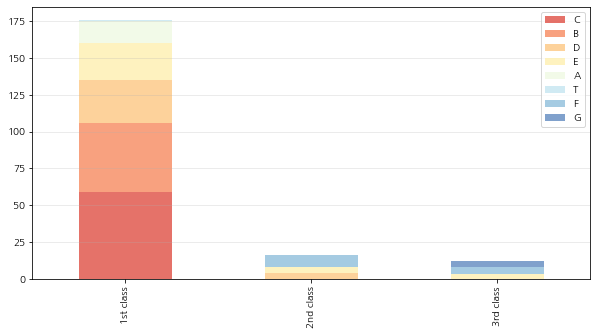

In [24]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5),
    alpha=0.7,
    color=sns.set_palette('RdYlBu',8)
)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

In [25]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in total_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [26]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,Mr,0


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,2.0,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2.0,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,2.0,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2.0,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2.0,S,Mrs,2


### Fare

#### 결측치 처리하기

In [29]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,Mr,0


#### 전체 Fare를 살펴보자

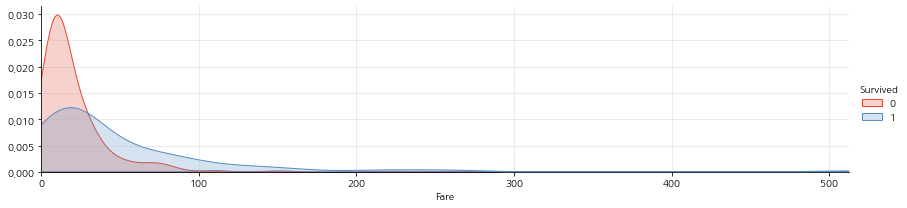

In [30]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.grid(True, alpha=0.3)
plt.show()

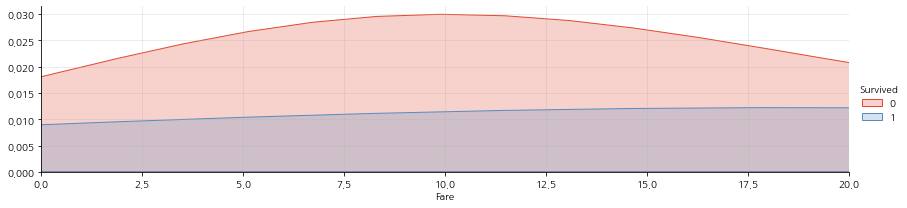

In [31]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)
plt.grid(True, alpha=0.3)
plt.show()

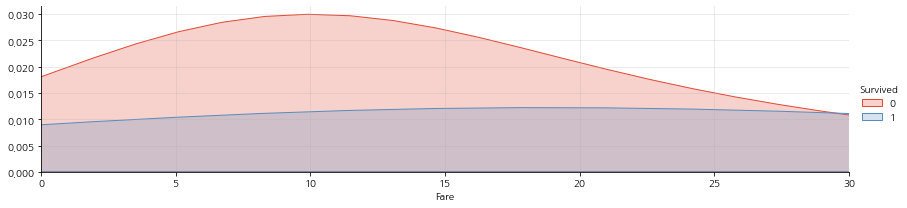

In [32]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)
plt.grid(True, alpha=0.3)
plt.show()

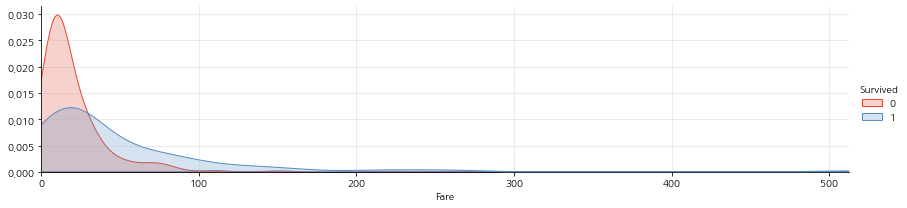

In [33]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)
plt.grid(True, alpha=0.3)
plt.show()

#### 수치형 변수를 범주형으로 바꿔보자

In [34]:
for dataset in total_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare2cat'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare2cat'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare2cat'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare2cat'] = 3

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,Mr,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,Miss,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,Mr,0,0.0


In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,2.0,Q,Mr,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2.0,S,Mrs,2,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,2.0,Q,Mr,0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2.0,S,Mr,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2.0,S,Mrs,2,0.0


### Age

#### 결측치 처리하기

In [37]:
train.Age.isnull().sum()

177

In [38]:
test.Age.isnull().sum()

86

Age에는 결측치가 존재했다. 이러한 결측치를 처리하는 방법이 간단하게 몇가지 있는데,  
   1. 결측치 비율이 높을 경우
       - 그냥 해당 컬럼은 사용하지 않음
   2. 결측치 비율이 적을 경우
       - 해당 컬럼의 평균값으로 대체
       - 해당 컬럼의 중앙값으로 대체
       
물론 결측치를 처리하는 방법은 이외에도 다양하지만 여기서는 간단하게 중앙값으로 처리하기로 한다.

In [39]:
# 기준을 Title로 하여 각 Title별 중앙값으로 대체하도록 하자
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,Mr,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,Miss,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,Mr,0,0.0


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,2.0,Q,Mr,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2.0,S,Mrs,2,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,2.0,Q,Mr,0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2.0,S,Mr,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2.0,S,Mrs,2,0.0


#### 전체 나이 분포 다시 살펴보기

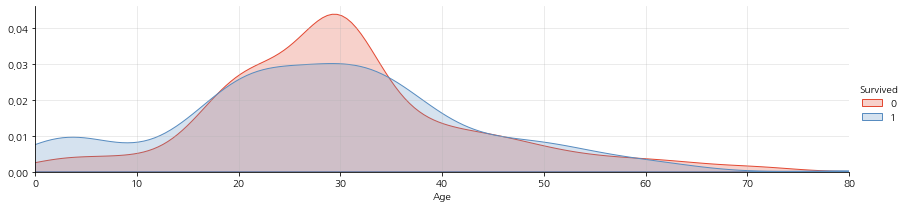

In [42]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.grid(True, alpha=0.3)
plt.show() 

##### 0~20세

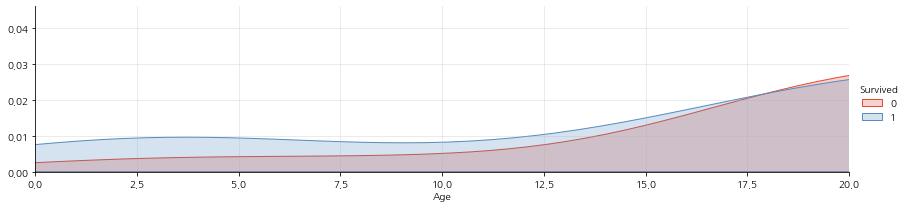

In [43]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)
plt.grid(True, alpha=0.3)
plt.show()

##### 20~30세

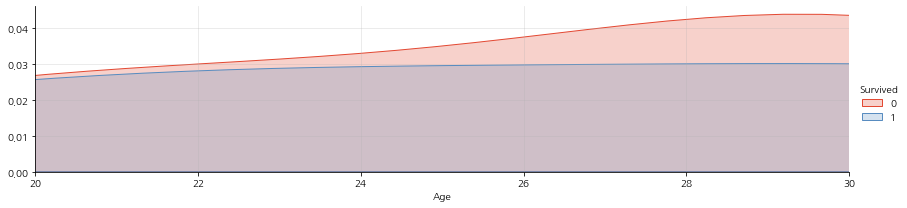

In [44]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)
plt.grid(True, alpha=0.3)
plt.show()

##### 30~40세

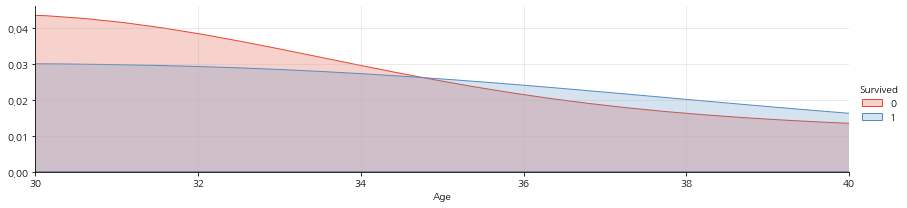

In [45]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)
plt.grid(True, alpha=0.3)
plt.show()

##### 40~60세

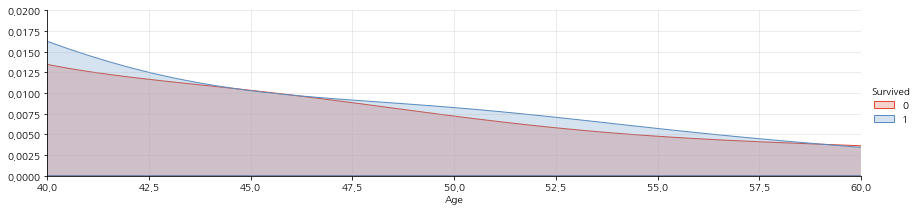

In [46]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)
plt.ylim(0,0.02)
plt.grid(True, alpha=0.3)
plt.show()

##### 60세 이상

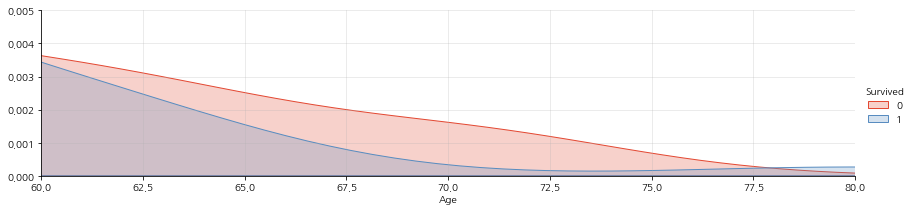

In [47]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)
plt.ylim((0,0.005))
plt.grid(True, alpha=0.3)
plt.show()

#### 나이대로 묶어주기
수치형으로 되어있는 피처를 아래와 같은 범주형으로 한번 바꿔보자.  
 
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [48]:
for dataset in total_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age2cat'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age2cat'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age2cat'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age2cat'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age2cat'] = 4

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,Mr,0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,2,2.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,Miss,1,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,2,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,Mr,0,0.0,2.0


In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,2.0,Q,Mr,0,0.0,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2.0,S,Mrs,2,0.0,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,2.0,Q,Mr,0,0.0,3.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2.0,S,Mr,0,0.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2.0,S,Mrs,2,0.0,1.0


### Sex

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(pd.concat([train.Sex,test.Sex]))

for dataset in total_data:
    dataset['Sex'] = le.transform(dataset['Sex'])

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0,S,Mr,0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,2,2.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,Miss,1,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.8,S,Mrs,2,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,S,Mr,0,0.0,2.0


In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2.0,Q,Mr,0,0.0,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2.0,S,Mrs,2,0.0,3.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2.0,Q,Mr,0,0.0,3.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2.0,S,Mr,0,0.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2.0,S,Mrs,2,0.0,1.0


### Embarked

#### 결측치 처리하기

In [54]:
train.Embarked.isnull().sum()

2

In [55]:
test.Embarked.isnull().sum()

0

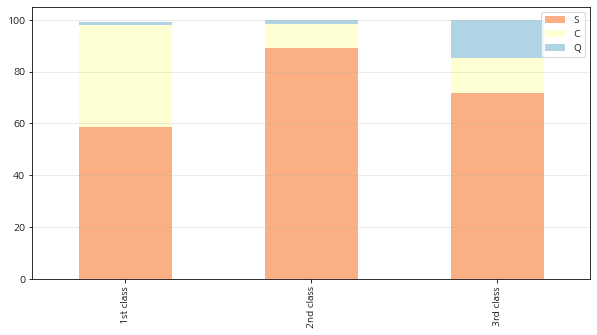

In [56]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts() / len(train[train['Pclass']==1]['Embarked']) * 100
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts() / len(train[train['Pclass']==2]['Embarked']) * 100
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts() / len(train[train['Pclass']==3]['Embarked']) * 100
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5),
    alpha=0.7,
    color=sns.set_palette('RdYlBu',3)
)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

대부분의 Embarked 컬럼은 Pclass별로만 봐도 `S`가 대부분인 것을 확인할 수 있다.  
그러므로 여기에서는 S로 처리하도록 하자. 

In [57]:
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [58]:
le = LabelEncoder()
le.fit(pd.concat([train.Embarked, test.Embarked]))
for dataset in total_data:
    dataset['Embarked'] = le.transform(dataset['Embarked'])

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0,2,Mr,0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.8,0,Mrs,2,2.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,2,Miss,1,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.8,2,Mrs,2,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,2,Mr,0,0.0,2.0


In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2.0,1,Mr,0,0.0,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2.0,2,Mrs,2,0.0,3.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2.0,1,Mr,0,0.0,3.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2.0,2,Mr,0,0.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2.0,2,Mrs,2,0.0,1.0


### FamilySize

In [61]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

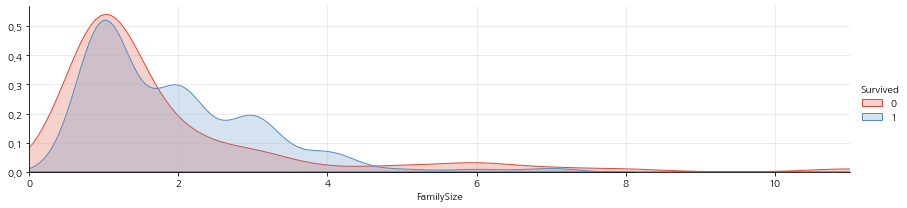

In [62]:
facet = sns.FacetGrid(train, 
                      hue="Survived", 
                      aspect=4,
                      palette=[
                          sns.color_palette('RdYlBu')[0],
                          sns.color_palette('RdYlBu')[-1]
                      ])
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
plt.grid(True, alpha=0.3)
plt.show()

In [63]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in total_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0,2,Mr,0,0.0,1.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.8,0,Mrs,2,2.0,3.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,2,Miss,1,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.8,2,Mrs,2,2.0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,2,Mr,0,0.0,2.0,0.0


In [65]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title,Fare2cat,Age2cat,FamilySize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2.0,1,Mr,0,0.0,2.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2.0,2,Mrs,2,0.0,3.0,0.4
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2.0,1,Mr,0,0.0,3.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2.0,2,Mr,0,0.0,2.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2.0,2,Mrs,2,0.0,1.0,0.8


## 최종 피처 선택 
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [66]:
SELECTED_FEATURES = [
    'Title',
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
]

In [67]:
train[SELECTED_FEATURES].head()

,Title,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,2,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [68]:
test[SELECTED_FEATURES].head()

,Title,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,2,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,2,3,0,22.0,1,1,12.2875,2


In [69]:
X = train[SELECTED_FEATURES]
y = train['Survived']

In [70]:
X.shape, y.shape

((891, 8), (891,))

## 원핫 인코딩

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
X.head()

,Title,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,2,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [73]:
def onehot(df, feature):
    le_season_type = LabelEncoder()
    le_season_type.fit(df[feature])
    df[feature] = le_season_type.transform(df[feature])
    df = pd.concat([df, pd.get_dummies(df[feature], prefix=feature)], axis=1)
    df.drop([feature], axis=1, inplace=True)
    display(df)
    return df

In [74]:
X = onehot(X, 'Title')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_0,Title_1,Title_2,Title_3,Title_4
0,3,1,22.0,1,0,7.2500,2,1,0,0,0,0
1,1,0,38.0,1,0,71.2833,0,0,0,1,0,0
2,3,0,26.0,0,0,7.9250,2,0,1,0,0,0
3,1,0,35.0,1,0,53.1000,2,0,0,1,0,0
4,3,1,35.0,0,0,8.0500,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,0,0,0,0,1
887,1,0,19.0,0,0,30.0000,2,0,1,0,0,0
888,3,0,21.0,1,2,23.4500,2,0,1,0,0,0
889,1,1,26.0,0,0,30.0000,0,1,0,0,0,0


In [75]:
X = onehot(X, 'Sex')

,Pclass,Age,SibSp,Parch,Fare,Embarked,Title_0,Title_1,Title_2,Title_3,Title_4,Sex_0,Sex_1
0,3,22.0,1,0,7.2500,2,1,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0,1,0
2,3,26.0,0,0,7.9250,2,0,1,0,0,0,1,0
3,1,35.0,1,0,53.1000,2,0,0,1,0,0,1,0
4,3,35.0,0,0,8.0500,2,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,2,0,0,0,0,1,0,1
887,1,19.0,0,0,30.0000,2,0,1,0,0,0,1,0
888,3,21.0,1,2,23.4500,2,0,1,0,0,0,1,0
889,1,26.0,0,0,30.0000,0,1,0,0,0,0,0,1


In [76]:
X = onehot(X, 'Embarked')

,Pclass,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Title_4,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,3,22.0,1,0,7.2500,1,0,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,0,0,1,0,1,0,0,1
887,1,19.0,0,0,30.0000,0,1,0,0,0,1,0,0,0,1
888,3,21.0,1,2,23.4500,0,1,0,0,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0,0,1,1,0,0


## 학습/평가 데이터 분리
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [78]:
X_train.shape, X_valid.shape

((712, 15), (179, 15))

In [79]:
y_train.shape, y_valid.shape

((712,), (179,))

## 모델링
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

### 로지스틱회귀

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
score_lr = model_lr.score(X_valid, y_valid)
print(f'선형회귀: {score_lr}')

선형회귀: 0.8156424581005587


### 나이브베이즈

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
score_nb = model_nb.score(X_valid, y_valid)
print(f'나이브베이즈: {score_nb}')

나이브베이즈: 0.7877094972067039


### 서포트 벡터 머신

In [84]:
from sklearn.svm import SVC

In [85]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
score_svc = model_svc.score(X_valid, y_valid)
print(f'서포트 벡터 머신: {score_svc}')

서포트 벡터 머신: 0.659217877094972


### 의사결정나무

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
score_dt = model_dt.score(X_valid, y_valid)
print(f'의사결정나무: {score_dt}')

의사결정나무: 0.7877094972067039


### 랜덤포레스트

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
score_rf = model_rf.score(X_valid, y_valid)
print(f'랜덤포레스트: {score_rf}')

랜덤포레스트: 0.8379888268156425


### XGBoost

In [90]:
from xgboost import XGBClassifier

In [91]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
score_xgb = model_xgb.score(X_valid, y_valid)
print(f'XGBoost: {score_xgb}')

XGBoost: 0.8435754189944135


## 하이퍼파라미터 튜닝
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = {
    'booster': ['gbtree'],
    'max_depth': [5, 6, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 2, 3],
    'colsample_bytree': [0.5, 0.8],
    'n_estimators': [50, 100],
}

In [94]:
from sklearn.model_selection import KFold

kf = KFold(
    random_state=42,
    n_splits=5,
    shuffle=True,
)

In [95]:
grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=2
)

In [96]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                          

In [97]:
grid_search.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'gamma': 2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100}

In [98]:
grid_search.cv_results_

{'mean_fit_time': array([0.14067197, 0.17106767, 0.1220593 , 0.15950584, 0.02757812,
        0.04824948, 0.03016505, 0.06111293, 0.03186221, 0.05548816,
        0.02961297, 0.05342298, 0.03419313, 0.06290665, 0.03262424,
        0.05243616, 0.02904892, 0.05023732, 0.02810593, 0.04309878,
        0.02533035, 0.0432373 , 0.02407312, 0.04232492, 0.030867  ,
        0.04202929, 0.02599745, 0.0496552 , 0.02870312, 0.05445156,
        0.03594141, 0.06257429, 0.03562789, 0.06033459, 0.03344197,
        0.05200591, 0.0265265 , 0.04675183, 0.02697587, 0.05059977,
        0.0282928 , 0.05115528, 0.03115125, 0.05845904, 0.03151636,
        0.05512481, 0.0314652 , 0.05485439, 0.03812156, 0.06992774,
        0.03544188, 0.06591897, 0.03339276, 0.05774093, 0.02920117,
        0.05156522, 0.02873073, 0.05235219, 0.02857575, 0.05185089,
        0.03325438, 0.05913525, 0.03351736, 0.05788093, 0.0297339 ,
        0.05870223, 0.03874803, 0.07057467, 0.03988609, 0.06630044,
        0.03337698, 0.05831337,

In [99]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bytree,param_gamma,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140672,0.020770,0.002885,0.000121,gbtree,0.5,0,5,1,50,"{'booster': 'gbtree', 'colsample_bytree': 0.5,...",0.832168,0.797203,0.795775,0.816901,0.838028,0.816015,0.017377,110
1,0.171068,0.010816,0.003364,0.000077,gbtree,0.5,0,5,1,100,"{'booster': 'gbtree', 'colsample_bytree': 0.5,...",0.818182,0.790210,0.802817,0.802817,0.845070,0.811819,0.018842,127
2,0.122059,0.004990,0.002624,0.000541,gbtree,0.5,0,5,3,50,"{'booster': 'gbtree', 'colsample_bytree': 0.5,...",0.846154,0.804196,0.781690,0.795775,0.859155,0.817394,0.029958,106
3,0.159506,0.010238,0.003255,0.000043,gbtree,0.5,0,5,3,100,"{'booster': 'gbtree', 'colsample_bytree': 0.5,...",0.832168,0.790210,0.795775,0.774648,0.866197,0.811799,0.033097,128
4,0.027578,0.004002,0.002561,0.000404,gbtree,0.5,0,5,5,50,"{'booster': 'gbtree', 'colsample_bytree': 0.5,...",0.825175,0.825175,0.767606,0.802817,0.887324,0.821619,0.039022,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.094477,0.003294,0.002461,0.000046,gbtree,0.8,3,8,1,100,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.839161,0.825175,0.802817,0.852113,0.845070,0.832867,0.017442,15
140,0.046851,0.001449,0.002360,0.000088,gbtree,0.8,3,8,3,50,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.839161,0.818182,0.781690,0.859155,0.852113,0.830060,0.027916,30
141,0.088881,0.002965,0.001775,0.000333,gbtree,0.8,3,8,3,100,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.839161,0.825175,0.781690,0.859155,0.852113,0.831459,0.027457,27
142,0.043636,0.002432,0.002436,0.000121,gbtree,0.8,3,8,5,50,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.825175,0.804196,0.781690,0.838028,0.852113,0.820240,0.024900,74


## 성능 평가
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

### 표

In [101]:
def make_cf_report(model):
    y_pred = model.predict(X_valid)
    cf_report = classification_report(y_valid, y_pred)
    print(cf_report)

In [102]:
# XGBoost
make_cf_report(model_xgb)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       105
           1       0.79      0.84      0.82        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.84      0.84       179



### 그래프

In [103]:
def get_scores(model, y_valid):
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    F1 = f1_score(y_valid, y_pred)
    AUC = roc_auc_score(y_valid, y_pred)
    return {'accuracy':accuracy, 'precision':accuracy, 'recall':recall, 'F1':F1, 'AUC':AUC}

In [104]:
df_score = pd.DataFrame({'model': [],
                         'score': [],
                         'kind': []})

for m in [model_lr, model_nb, model_svc, model_dt, model_rf, model_xgb]:
    df_tmp = pd.DataFrame({'model': [str(m).split('(')[0]]*5,
                           'score': get_scores(m, y_valid).values(),
                           'kind': get_scores(m, y_valid).keys()})
    df_score = pd.concat([df_score, df_tmp])

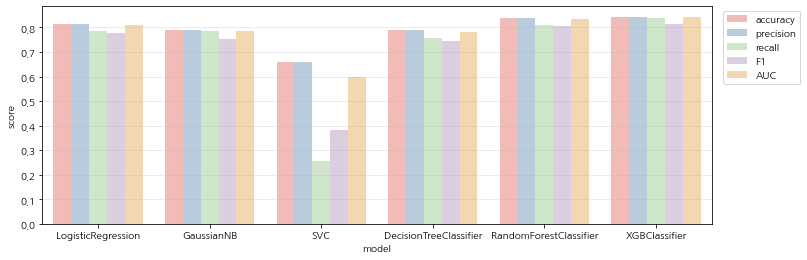

In [105]:
plt.figure(figsize=(12,4))
sns.barplot(
    data=df_score,
    x='model',
    y='score',
    hue='kind',
    palette='Pastel1'
)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## 참고자료
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

- 

<br>

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 모든 자료의 저작권은 성민석에 있으며 제작자의 동의없이 외부로의 무단 복제, 배포 및 전송을 절대로 불허합니다.

<b>Copyright ⓒ 2022. Minsuk Sung. All rights reserved.</b>
</span>

<br>